# Introduction to continuous normal distributions

This tutorial emphasises the connections between 
* histograms
* probability density functions
* probability mass functions

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import string

from pandas import Series
from pandas import DataFrame
from typing import List,Tuple

from pandas import Categorical
from pandas.api.types import CategoricalDtype

from tqdm import tnrange#, tqdm_notebook
from sklearn.linear_model import LogisticRegression
from plotnine import *

# Local imports
from common import *
from convenience import *

In [3]:
from scipy.stats import norm
from scipy.stats import binom

## I. Probability density and probability mass functions

Let us visualise probability density and probability mass functions. For that we choose a standard normal distribution and shifted and rescaled binomial distribution that matches the mean and standard deviation.

In [60]:
pdf = DataFrame({'x':np.linspace(-4, 4, 100)}).assign(density = lambda df: norm.pdf(df['x']))

pmf = (DataFrame({'k':range(0,40)})
       .assign(probability =  lambda df: binom(40, 0.5).pmf(df['k']))
       .assign(x = lambda df: (df['k'] - 20)/np.sqrt(40 * (1-0.5) * 0.5)))

In [34]:
mdisplay([head(pdf), head(pmf)], ['density', 'probability'])

density probability 
 
 
 x 
 density 
 
 
 
 
 -4.000000 
 0.000134 
 
 
 -3.919192 
 0.000184 
 
 
 -3.838384 
 0.000252 
 
 
 -3.757576 
 0.000343 
 
 
 -3.676768 
 0.000463 
 
 
 
 
 
 k 
 probability 
 x 
 
 
 
 
 0 
 9.094947e-13 
 -3.162278 
 
 
 1 
 3.637979e-11 
 -3.004164 
 
 
 2 
 7.094059e-10 
 -2.846050 
 
 
 3 
 8.985808e-09 
 -2.687936 
 
 
 4 
 8.311872e-08 
 -2.529822

If we plot the probability desity functiona and probability mass function on the same graph we get annpying discrepancy. 

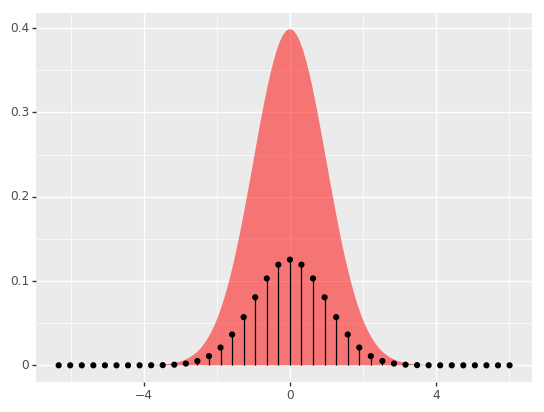

<ggplot: (7547947121)>

In [61]:
p = ggplot(pdf)
p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'red')
p = p + geom_point(aes(x = 'x', y = 'probability'), data = pmf)
p = p + geom_segment(aes(x = 'x', xend = 'x', yend = 'probability'), y=0, data = pmf)
p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)
p.save('pdf_vs_pmf.pdf', path='results', height=6, width=12, verbose=False)

### Explanation 

Definitions of both functions lead to different and usually incompatible normalisation constraints:   
* The definition of probability density function assures that the area under the function must be one.
* The definition of probability mass function assures that the sum of all peaks must be one.

It is straightforward to check that density function does not follow sum normalisation.

In [62]:
norm.pdf(pmf['x']).sum()

3.162277659106854

On the same time probability mass function can be used to define histogram where the width of the bars is

In [63]:
pmf.loc[1:39, 'x'].values - pmf.loc[0:38,'x'].values

array([0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
       0.31622777, 0.31622777, 0.31622777, 0.31622777])

Thus we should build a density plot from probability mass function where the area under the line is one. 

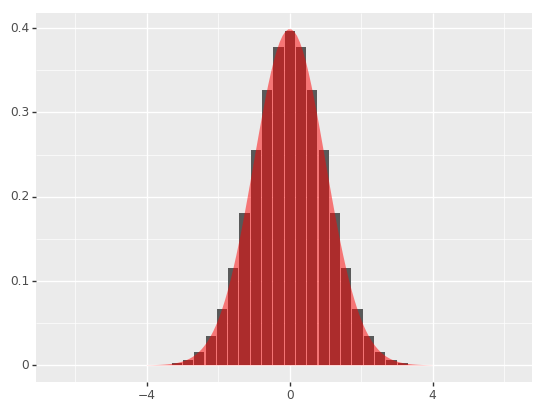

<ggplot: (-9223372029306730152)>

In [65]:
pmf = pmf.assign(density =  lambda df: df['probability']/0.15811388/2)

p = ggplot(pdf)
p = p + geom_col(aes(x = 'x',  y = 'density'), data = pmf)
p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'red')
p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)


Similarly, we can compress the probability density function into probability mass function if we make sure that the sum of densities is one. This is crude estimation and should be replaced with something more clever in the home exercise.

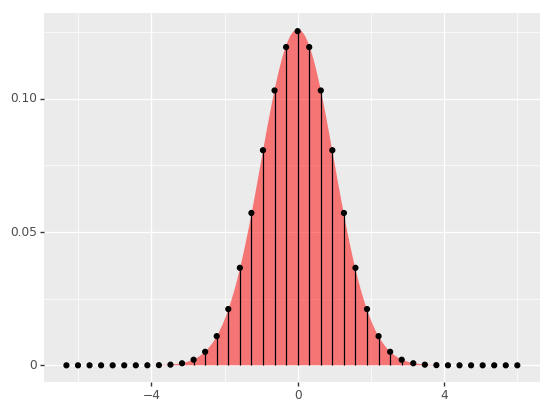

<ggplot: (-9223372029306380649)>

In [74]:
pdf = pdf.assign(probability =  lambda df: df['density']/norm.pdf(pmf['x']).sum())

p = ggplot(pdf)
p = p + geom_area(aes(x = 'x', y = 'probability'), position=position_identity, alpha = 0.5, fill = 'red')
p = p + geom_point(aes(x = 'x', y = 'probability'), data = pmf)
p = p + geom_segment(aes(x = 'x', xend = 'x', yend = 'probability'), y=0, data = pmf)
p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)



## II. Standard normal distribution


In [4]:
pdf = DataFrame({'x':np.linspace(-4, 4, 100)}).assign(density = lambda df: norm.pdf(df['x']))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


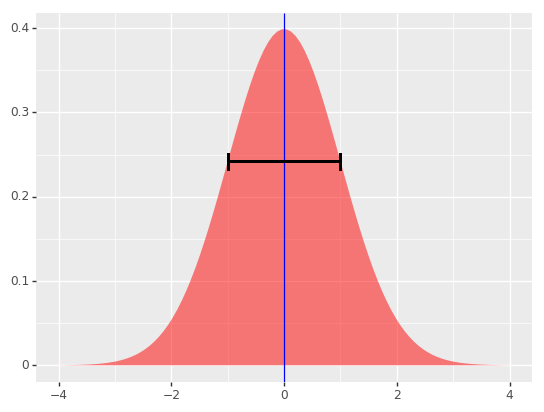

<ggplot: (7553038056)>

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


In [24]:
p = ggplot(pdf)
p = p + geom_area(aes(x = 'x', y = 'density'), position=position_identity, alpha = 0.5, fill = 'red')
p = p + geom_vline(xintercept = 0, color='blue')
p = p + geom_errorbarh(aes(y=norm.pdf(1)), xmin=-1, xmax=1, height = 0.02)
p = p + scale_x_continuous(name='') + scale_y_continuous(name='')
display(p)
p.save('standard_normal_distribution.pdf', path='results', height=6, width=12, verbose=False)

## III. Affine transformations of standard normal distribution

Let us derive graphically approximate density function for $y=\sigma x + \mu$ where $x\sim\mathcal{N}(0,1)$.
First let us split the $x$-axis into small segments using a grid 

In [94]:
pdf =  DataFrame({'x': np.linspace(-4, 4, 400)}).assign(density = lambda df: norm.pdf(df['x']))
xgrid = DataFrame({'x': np.linspace(-3, 3, 9)}).assign(density = lambda df: norm.pdf(df['x']))

### Approximation on for x variable

* For each grid point $x_i$ we can approximate the probability that $x$  falls into the segment $[x_i-\Delta,x_i+\Delta]$ by the quantity $2\Delta\cdot p(x_i)$ 
* The latter is equal to the area of the columns in the figure below. The appoximation becomes more and more precise when $\Delta\to 0$.

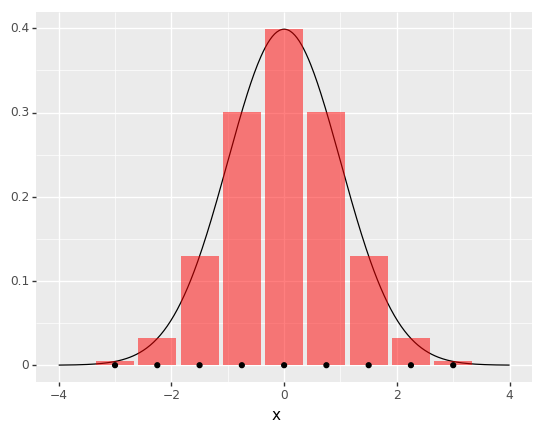

<ggplot: (-9223372029298765017)>

In [95]:
p = ggplot(xgrid)
p = p + geom_line(aes(x = 'x', y = 'density'), data = pdf)
p = p + geom_col(aes(x = 'x', y = 'density'), alpha = 0.5, fill = 'red')
p = p + geom_point(aes(x = 'x'), y=0)
p = p + scale_y_continuous(name='')
p.save('1d_source_distribution.pdf', path='results', height=6, width=6, verbose=False)
display(p)

### Approximation for y variable

* As $y=\sigma x+\mu$ then $y$ falls into $[\sigma (x_i-\Delta) + \mu,\sigma (x_i+\Delta) + \mu]$ when $x$ is in the segment $[x_i-\Delta,x_i+\Delta]$. 
* As the density $q(y)$ must be such that the area of corresponding column is equal to the probability we get $2\sigma\Delta\cdot q(y)= 2\Delta\cdot p(x)$.
* As a result, the density for $y$ can be expresssed 

\begin{align*}
q(y)=\frac{p(x)}{\sigma}=\frac{1}{\sqrt{2\pi}\sigma}\cdot\exp{\frac{(y-\mu)^2}{2\sigma^2}}\enspace.
\end{align*}


In [98]:
sigma = 10
mu = 5
ygrid = (xgrid
         .assign(y = lambda df: sigma * df['x'] + mu)
         .assign(y_density = lambda df: df['density']/sigma)
         .rename(columns = {'density': 'x_density'}))

pdf = (DataFrame({'y': np.linspace(-4*sigma + mu, 4*sigma + mu, 400)})
       .assign(density = lambda df: norm(loc =  mu, scale = sigma).pdf(df['y'])))

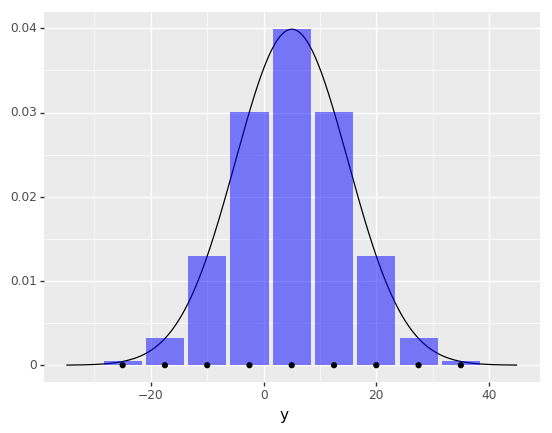

<ggplot: (7555259333)>

In [99]:
p = ggplot(ygrid)
p = p + geom_line(aes(x = 'y', y = 'density'), data = pdf)
p = p + geom_col(aes(x = 'y', y = 'y_density'), alpha = 0.5, fill = 'blue')
p = p + geom_point(aes(x = 'y'), y = 0)
p = p + scale_y_continuous(name='')
display(p)
p.save('1d_target_distribution.pdf', path='results', height=6, width=6, verbose=False)

Indeed the shifted density approximation follows the true density of $\mathcal{N}(\mu=5, \sigma=10)$

# Homework

## 1.1 Standard normal distribution as limiting distibution (<font color='red'>1p</font>)

shoe convergence for $p=0.75$

In [2]:
%config IPCompleter.greedy=True